In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
# {"grid.color": ".6", "grid.linestyle": ":"}
sns.set(font_scale = 1.0)
sns.set_style(style = "white")

In [2]:
n = 2048
ntheta = 1500
nz = 32
t_unet_per_vox = 28.00 # nanoseconds

In [3]:
def get_df(ntheta, n, nz, tag = "fbp"):
    df = pd.read_csv(f'/data02/MyArchive/aisteer_3Dencoders/tmp_data/time_logs/{tag}_times_n{n}_ntheta{ntheta}_nc{nz}.csv')
    if "t_backproj" in df.columns:
        df.rename(columns = {"t_backproj":"t_bp"}, inplace = True)
    
    df['${1/r}$'] = 1.0/df['r_fac']
    df['t_fbp_gpu'] = df['t_filt'] + df['t_mask'] + df['t_bp']
    df['t_fbp'] = df['t_cpu2gpu'] + df['t_fbp_gpu'] + df['t_gpu2cpu']
    df['speedup-fbp-gpu'] = df['t_fbp_gpu'].iloc[-1]/df['t_fbp_gpu']
    df['speedup-bp'] = df['t_bp'].iloc[-1]/df['t_bp']
    df['speedup-fbp'] = df['t_fbp'].iloc[-1]/df['t_fbp']
    df["t_seg"] = df['r_fac']*n*n*nz*t_unet_per_vox*1.0e-6
    df["t_tot"] = df["t_seg"] + df["t_fbp"]
    df['speedup-tot'] = df['t_tot'].iloc[-1]/df['t_tot']    
    return df

In [4]:
df = get_df(ntheta, n, nz, tag = "rp3d_fbp")

Text(0.5, 1.0, 'ntheta = 1500, n = 2048, nz = 32')

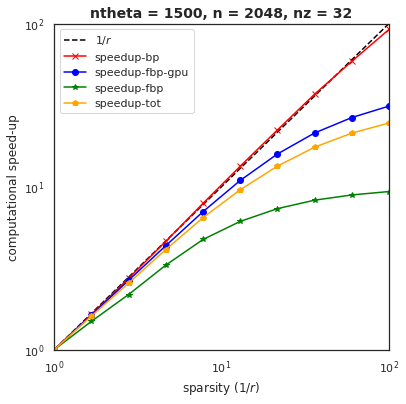

In [5]:
fig, ax = plt.subplots(1,1, figsize = (6,6))
labels = ['${1/r}$', 'speedup-bp', 'speedup-fbp-gpu', 'speedup-fbp', 'speedup-tot']
colors = ['black', 'red', 'blue', 'green', 'orange']
markers = ['--', 'x-', 'o-', '*-', '-p']

for iplot, label in enumerate(labels):
    ax.plot(df['${1/r}$'], df[label], markers[iplot], color = colors[iplot], label = label)
ax.set_xlabel("sparsity (${1/r}$)")
ax.set_ylabel("computational speed-up")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([1,100])
ax.set_ylim([1,100])
ax.legend()
ax.set_title(f"ntheta = {ntheta}, n = {n}, nz = {nz}", fontsize = 14, fontweight = "bold")